In [1]:
# First import the packages used in the project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data
df = pd.read_csv(r'C:\..\movies.csv')


In [2]:
# Print the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [3]:
# Check if there is any missing data
# Loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing)*100))

budget - 28.31246739697444%
company - 0.2217005738132499%
country - 0.03912363067292645%
director - 0.0%
genre - 0.0%
gross - 2.464788732394366%
name - 0.0%
rating - 1.004173187271779%
released - 0.02608242044861763%
runtime - 0.05216484089723526%
score - 0.03912363067292645%
star - 0.013041210224308816%
votes - 0.03912363067292645%
writer - 0.03912363067292645%
year - 0.0%


In [4]:
# Data types for the columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

<AxesSubplot:>

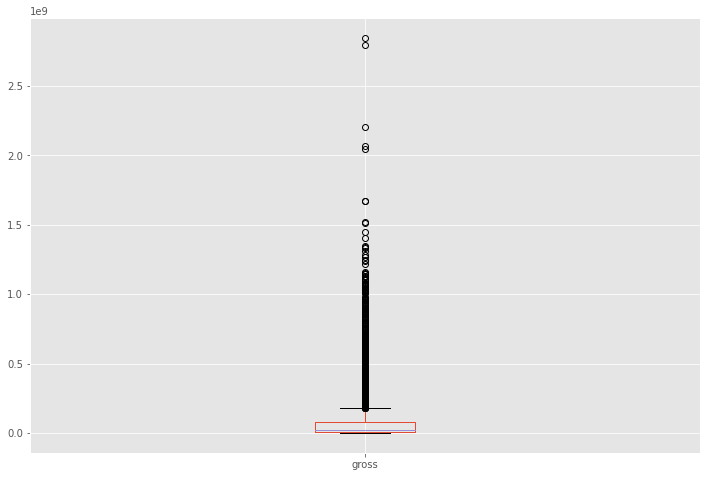

In [5]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [6]:
# Drop any duplicates

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [7]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000.0,Twentieth Century Fox,United States,James Cameron,Action,2.847246e+09,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000.0,Twentieth Century Fox,United States,James Cameron,Drama,2.201647e+09,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000.0,Lucasfilm,United States,J.J. Abrams,Action,2.069522e+09,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [8]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,NaN,United States,Joseph Ebanks,Drama,NaN,More to Life,NaN,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020
7664,NaN,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,NaN,Dream Round,NaN,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020
7665,58750.0,Embi Productions,United States,Nkanya Nkwai,Drama,NaN,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",NaN,5.7,Onyama Laura,29.0,Lynno Lovert,2020
7666,15000.0,NaN,United States,James Randall,Drama,NaN,It's Just Us,NaN,"October 1, 2020 (United States)",120.0,NaN,Christina Roz,NaN,James Randall,2020


In [9]:
# Hypothesis 1: Budget has a high correlation with gross revenue
# Hypothesis 2: Company has a high correlation with gross revenue


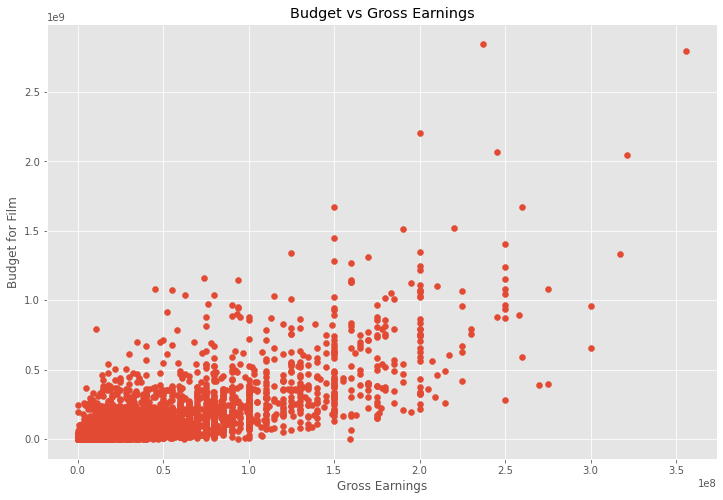

In [10]:
# Scatter plot with budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()



In [11]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


<AxesSubplot:xlabel='budget', ylabel='gross'>

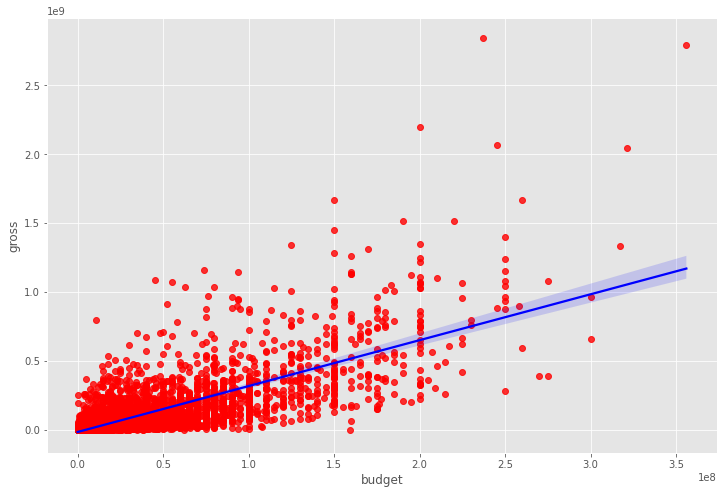

In [12]:
# Plot budget vs gross earnings using seaborn

sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [13]:
# Correlation Matrix between all numeric columns

In [14]:
df.corr(method='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.329321
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.257486
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120811
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.097995
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.222945
year,0.329321,0.257486,0.120811,0.097995,0.222945,1.000000


In [15]:
# High correlation between budget and gross
# Hypothesis 1 correct

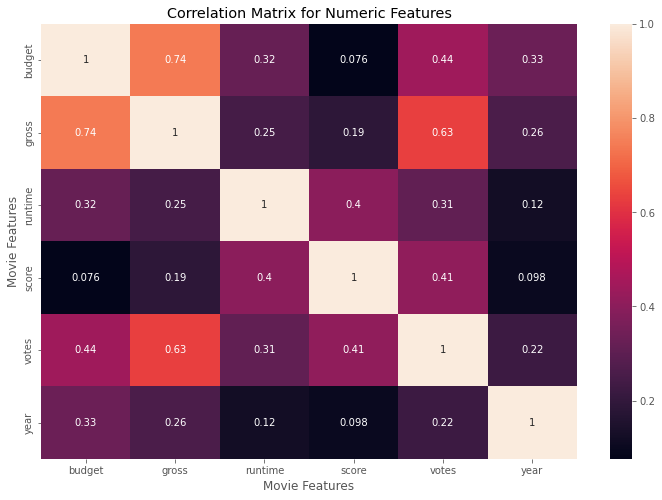

In [16]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [17]:
# Looks at Company

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [18]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,2319,54,2589,6,46998772.0,6587,6,1705,146.0,8.4,1047,927000.0,4014,1980
1,4500000.0,731,55,2269,1,58853106.0,5573,6,1492,104.0,5.8,327,65000.0,1632,1980
2,18000000.0,1540,55,1111,0,538375067.0,5142,4,1771,124.0,8.7,1745,1200000.0,2567,1980
3,3500000.0,1812,55,1301,4,83453539.0,286,4,1492,88.0,7.7,2246,221000.0,2000,1980
4,6000000.0,1777,55,1054,4,39846344.0,1027,6,1543,98.0,7.3,410,108000.0,521,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,-1,55,1500,6,NaN,3705,-1,2964,90.0,3.1,2421,18.0,2289,2020
7664,NaN,539,55,774,4,NaN,1678,-1,1107,90.0,4.7,1886,36.0,2614,2020
7665,58750.0,941,55,2061,6,NaN,4717,-1,193,NaN,5.7,2040,29.0,2683,2020
7666,15000.0,-1,55,1184,6,NaN,2843,-1,2817,120.0,NaN,450,NaN,1824,2020


In [19]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,2319,54,2589,6,46998772.0,6587,6,1705,146.0,8.4,1047,927000.0,4014,1980
1,4500000.0,731,55,2269,1,58853106.0,5573,6,1492,104.0,5.8,327,65000.0,1632,1980
2,18000000.0,1540,55,1111,0,538375067.0,5142,4,1771,124.0,8.7,1745,1200000.0,2567,1980
3,3500000.0,1812,55,1301,4,83453539.0,286,4,1492,88.0,7.7,2246,221000.0,2000,1980
4,6000000.0,1777,55,1054,4,39846344.0,1027,6,1543,98.0,7.3,410,108000.0,521,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000.0,-1,55,1500,6,NaN,3705,-1,2964,90.0,3.1,2421,18.0,2289,2020
7664,NaN,539,55,774,4,NaN,1678,-1,1107,90.0,4.7,1886,36.0,2614,2020
7665,58750.0,941,55,2061,6,NaN,4717,-1,193,NaN,5.7,2040,29.0,2683,2020
7666,15000.0,-1,55,1184,6,NaN,2843,-1,2817,120.0,NaN,450,NaN,1824,2020


In [20]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.173214,0.054063,-0.012272,-0.356564,0.740395,0.023970,-0.176002,0.014683,0.320447,0.076254,-0.019589,0.442429,-0.039451,0.329321
company,0.173214,1.000000,0.095548,0.004404,-0.071067,0.154840,0.009211,-0.032943,-0.010474,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431
country,0.054063,0.095548,1.000000,0.017490,-0.037615,0.092129,-0.010737,0.081244,-0.020427,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938
director,-0.012272,0.004404,0.017490,1.000000,-0.015258,-0.014441,0.009079,0.019483,-0.001478,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795
genre,-0.356564,-0.071067,-0.037615,-0.015258,1.000000,-0.235650,0.016355,0.072423,0.029822,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261
gross,0.740395,0.154840,0.092129,-0.014441,-0.235650,1.000000,0.005533,-0.107339,0.001659,0.245216,0.186258,-0.002717,0.630757,-0.023519,0.257486
name,0.023970,0.009211,-0.010737,0.009079,0.016355,0.005533,1.000000,-0.008069,-0.011311,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453
rating,-0.176002,-0.032943,0.081244,0.019483,0.072423,-0.107339,-0.008069,1.000000,0.016613,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779
released,0.014683,-0.010474,-0.020427,-0.001478,0.029822,0.001659,-0.011311,0.016613,1.000000,0.000868,0.042788,0.015777,0.016097,-0.002404,-0.000695
runtime,0.320447,0.034402,-0.078412,0.017624,-0.052711,0.245216,0.010392,0.062145,0.000868,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811


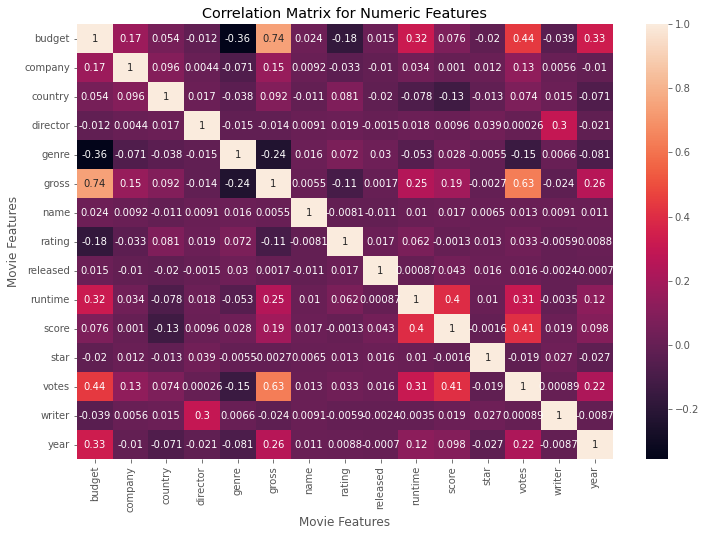

In [21]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [22]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget  budget      1.000000
        company     0.173214
        country     0.054063
        director   -0.012272
        genre      -0.356564
                      ...   
year    score       0.097995
        star       -0.027242
        votes       0.222945
        writer     -0.008656
        year        1.000000
Length: 225, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.356564
budget    genre      -0.356564
genre     gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.630757
gross     votes       0.630757
          budget      0.740395
budget    gross       0.740395
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [25]:
# Hypothesis 1 true, Votes and budget have the highest correlation to gross earnings

# Hypothesis 2 false, Company has low correlation to gross earnings